In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as ny # linear algebra
import pandas as ps # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-modelling/Churn_Modelling.csv


In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [3]:
dataset =  ps.read_csv('/kaggle/input/churn-modelling/Churn_Modelling.csv')
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
dataset.shape

(10000, 14)

In [5]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
dataset.duplicated().sum()

0

In [8]:
dataset['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [9]:
dataset['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [10]:
dataset['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [11]:
dataset.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace = True)
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
dataset = ps.get_dummies(dataset, columns = ['Geography', 'Gender'], drop_first = True)
dataset

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [13]:
x = dataset.drop(columns = ['Exited'])
y = dataset['Exited']
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [14]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [15]:
from  sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrainscaled = scaler.fit_transform(xtrain)
xtestscaled = scaler.transform(xtest)

In [16]:
model = Sequential()
model.add(Dense(11, activation = 'relu', input_dim = 11))
model.add(Dense(11, activation = 'relu'))
model.add(Dense(11, activation = 'relu'))
model.add(Dense(11, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

2022-12-27 23:07:29.802493: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                132       
_________________________________________________________________
dense_1 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_2 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_3 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 12        
Total params: 540
Trainable params: 540
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [19]:
history = model.fit(xtrainscaled, ytrain, epochs = 100, validation_split = 0.2)

2022-12-27 23:07:29.942750: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
200/200 [==============================] - 1s 4ms/step - loss: 0.5488 - accuracy: 0.7742 - val_loss: 0.4907 - val_accuracy: 0.7975
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4725 - accuracy: 0.7975 - val_loss: 0.4594 - val_accuracy: 0.7987
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4383 - accuracy: 0.8072 - val_loss: 0.4336 - val_accuracy: 0.7975
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4125 - accuracy: 0.8214 - val_loss: 0.4104 - val_accuracy: 0.8194
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3935 - accuracy: 0.8358 - val_loss: 0.3928 - val_accuracy: 0.8325
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3791 - accuracy: 0.8439 - val_loss: 0.3781 - val_accuracy: 0.8425
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3663 - accuracy: 0.8522 - val_loss: 0.3694 - val_accuracy: 0.8487

In [20]:
model.layers[0].get_weights()

[array([[ 0.07096631, -0.555841  , -0.10137244,  0.08216602,  0.01386482,
         -0.04264731, -0.27418396,  0.13659918, -0.43190446,  0.06755432,
          0.15225978],
        [ 0.57863057, -0.66391283, -0.34954062,  0.35467324,  0.6130109 ,
         -0.5948344 , -0.33394325, -0.6331104 , -0.00954152,  0.0282378 ,
         -0.299937  ],
        [ 0.10006334, -0.26202375, -0.13704339,  0.3329069 ,  0.23182411,
          0.02432998,  0.25793168,  0.13579226,  0.39213577,  0.05395008,
         -0.28177392],
        [ 0.14749917,  0.2775818 ,  0.08682489,  0.2465697 , -1.0076821 ,
          0.08372539, -0.24806266, -0.1471528 ,  0.11545214, -0.11568008,
         -0.20945683],
        [ 1.1725861 ,  0.13045219,  0.11774365, -0.58682907,  0.29707643,
          0.23968568, -0.27460492,  0.5334552 ,  0.04439283, -0.365833  ,
          0.9827721 ],
        [-0.15808623,  0.09508986,  0.14607048, -0.08296608, -0.24910076,
         -0.12194581, -0.50527245, -0.2595176 , -0.4013658 , -0.2156659

In [21]:
model.layers[1].get_weights()

[array([[ 1.35249421e-01,  5.68946362e-01,  5.94899893e-01,
         -9.01744008e-01,  2.71022975e-01, -4.00883645e-01,
         -4.94744807e-01,  5.68739295e-01,  2.50525475e-01,
         -5.34279346e-01,  3.31881791e-01],
        [-1.17851841e+00,  1.67598277e-01,  2.45246634e-01,
          3.31820756e-01,  6.63504720e-01, -4.99895096e-01,
          2.79999793e-01, -2.53256738e-01, -9.22435778e-04,
          4.22924131e-01,  1.45436227e-01],
        [ 3.58647019e-01,  3.57723385e-01, -5.97944073e-02,
         -2.07472339e-01,  1.92293718e-01,  3.51256907e-01,
          4.86118913e-01,  1.12681627e-01, -2.69238770e-01,
         -2.81372339e-01,  2.57929444e-01],
        [-1.54080659e-01, -1.68128267e-01, -4.72335368e-01,
         -1.72487259e-01,  3.03679377e-01,  6.73545361e-01,
         -2.62998492e-01, -7.04400480e-01,  3.28442812e-01,
          2.83114731e-01,  1.46716192e-01],
        [-1.64352059e-02, -3.22030663e-01, -5.73162496e-01,
          2.42773309e-01,  5.80223322e-01, -

In [22]:
model.layers[2].get_weights()

[array([[ 1.4019617 ,  0.41518977, -0.78475285, -0.92674094,  1.57027   ,
         -1.2534366 ,  0.6565554 , -0.63559926,  1.2530429 , -0.9612132 ,
         -1.0087276 ],
        [ 0.41983485, -0.44072726, -0.08611559,  0.59798527,  0.37607014,
          0.39990318,  0.05689061, -0.11601441,  0.19162482,  0.59868187,
          0.576169  ],
        [-0.19328234, -0.4571467 , -0.7707763 ,  0.19005188,  0.42253473,
          0.5954386 ,  0.06823545, -0.7575126 ,  0.19709487,  0.5296271 ,
          0.24767973],
        [-0.06915171,  0.15542811,  0.1379992 ,  0.6817466 , -0.7992345 ,
          0.5955154 , -0.54122007,  0.47609296,  0.02217434,  0.23593536,
          0.7775137 ],
        [ 0.05165264, -0.24441166,  0.10680924, -0.47304276,  0.24310857,
         -0.30947125, -0.1875045 , -0.14959465,  0.12625271, -0.41279963,
          0.24202247],
        [ 0.32364637, -0.18783483, -0.74056154,  0.3904368 ,  0.3971829 ,
          0.44261858, -0.29107687, -0.410353  ,  0.32858112, -0.2902034

In [23]:
model.layers[4].get_weights()

[array([[-0.6475409 ],
        [ 0.57251513],
        [-0.7724194 ],
        [ 0.54549897],
        [ 0.48710406],
        [ 0.31896365],
        [-1.1643906 ],
        [-0.8184968 ],
        [ 0.6440417 ],
        [-0.603209  ],
        [ 1.0392972 ]], dtype=float32),
 array([-0.09642378], dtype=float32)]

In [24]:
model.predict(xtestscaled)

array([[0.01556176],
       [0.13210112],
       [0.03683931],
       ...,
       [0.0510681 ],
       [0.01395309],
       [0.6985104 ]], dtype=float32)

In [25]:
ylog = model.predict(xtestscaled)

In [26]:
ny.where(ylog > 0.5, 1, 0) 

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [27]:
ypred = ny.where(ylog > 0.5, 1, 0) 

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.8525

In [29]:
history

In [30]:
history.history

{'loss': [0.548814594745636,
  0.4725152850151062,
  0.4383012652397156,
  0.4124538004398346,
  0.39353102445602417,
  0.37905052304267883,
  0.36629757285118103,
  0.3571208715438843,
  0.3515329658985138,
  0.3478192090988159,
  0.3455065190792084,
  0.34484225511550903,
  0.3424901068210602,
  0.3404778242111206,
  0.3397975265979767,
  0.3377646207809448,
  0.33745279908180237,
  0.3365496098995209,
  0.33597955107688904,
  0.33452045917510986,
  0.3351393938064575,
  0.3334916830062866,
  0.333036869764328,
  0.33207717537879944,
  0.3322436213493347,
  0.3313038647174835,
  0.3297748863697052,
  0.33014416694641113,
  0.32968461513519287,
  0.3292329013347626,
  0.32963502407073975,
  0.32781174778938293,
  0.3278508484363556,
  0.32809603214263916,
  0.3265398442745209,
  0.3260975778102875,
  0.32629093527793884,
  0.32630398869514465,
  0.3244743347167969,
  0.32524117827415466,
  0.32398277521133423,
  0.3243056535720825,
  0.32422927021980286,
  0.3228411078453064,
  0.3231

In [31]:
# import plotly.express as px
import matplotlib.pyplot as plt


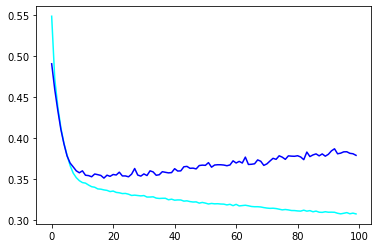

In [32]:
# fig = px.line(history, x="Epoch", y="loss", tiafmtle='Loss Rate')
# fig.show()
plt.plot(history.history['loss'], color = 'cyan', label = 'Loss')
plt.plot(history.history['val_loss'], color = 'Blue', label = 'Val_loss')

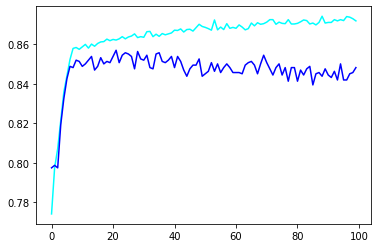

In [33]:
plt.plot(history.history['accuracy'], color = 'cyan', label = 'Accuracy')
plt.plot(history.history['val_accuracy'], color = 'Blue', label = 'Val_Accuracy')